# HLT Assignment

In addition to practising the process of loading data, regularizing it and using it to train a model, the goal of this assignment is to investigat the effect of changing model parameters on the performance.

## Step 1: loading the data

We'll be going a bit further with the robot collision dataset. This time, instead of looking at just the first file, we'll look at all five different tasks combined (lp1.data to lp5.data). Prepare two different arrays, X1 and X2, as follows:
- Each element in X1 is the immediate reading of the force and torque values after an event, [f1, f2, f3, t1, t2, t3]. The first element should be [1, 1, 63, 3, 1, 0]
- Each element in X2 contains 18 values in total - the first, fifth and tenth sets of sensor readings after an event. The first element should be [-1, -1, 61, -3, 0, 0, -1, -1, 63, -3, -1, 0, -1, -1, 61, -3, 0, 0]

y should contain the corresponding classes, represented as integers according the the provided dictionary

In [1]:
files = ['robot_execution_failure/lp1.data', 'robot_execution_failure/lp2.data',
'robot_execution_failure/lp3.data', 'robot_execution_failure/lp4.data', 'robot_execution_failure/lp5.data']
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3}

### Load the data files

In [2]:
files = ['lp1.data', 'lp2.data','lp3.data', 'lp4.data', 'lp5.data']
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3}

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
% matplotlib inline

In [5]:
f1 = open(files[0]);
f2 = open(files[1]);
f3 = open(files[2]);
f4 = open(files[3]);
f5 = open(files[4]);

file_1 =f1.readlines();
file_2 =f2.readlines();
file_3 =f3.readlines();
file_4 =f4.readlines();
file_5 =f5.readlines();

#### Combine into one dat frame

In [6]:
def FileReader(doc):
    
    global Arr_1,Arr_2, Event,Arr_2_Event
    
    Arr_1=[]#creating an empty array for the force and torque readings
    Event = []#creating an array for the event that took place i.e. collision
    
    
    for i in range(len(doc)):
    
        line = doc[i].strip().split('\t')
        if doc[i]!='\n':
            if len(line) == 1:#when the event occurred
                global event, occur
                event = line
            elif len(line) != 1:# if the line is not an event but readings
                Arr_1.append(line)
                Event.append(event)
    
    Arr_2 = []# Creating an Array for X2
    Arr_2_Event = []# event array for X2
    n = 0
    while n != len(Event):
        Arr_2.append(Arr_1[n]+Arr_1[n+5]+Arr_1[n+10])#take the first, the fifth and the tenth readings in an event
        Arr_2_Event.append(Event[n]+Event[n+5]+Event[n+10])
        n = n+15
    
    return

In [7]:
FileReader(file_1)

In [8]:
print(Arr_1[285:300]);
print(Event[255:270]);

[['185', '105', '118', '-180', '374', '12'], ['-10', '5', '75', '-36', '34', '-2'], ['-1', '-4', '43', '1', '-8', '0'], ['-10', '-2', '64', '3', '-19', '0'], ['0', '-2', '66', '1', '0', '0'], ['0', '1', '58', '-5', '2', '-1'], ['0', '-5', '61', '2', '-2', '1'], ['0', '-4', '57', '1', '-4', '0'], ['-1', '-1', '59', '-1', '-4', '0'], ['-1', '1', '64', '-5', '-6', '1'], ['0', '0', '67', '-6', '-3', '0'], ['-4', '0', '61', '-5', '-7', '0'], ['-3', '1', '60', '-6', '-4', '0'], ['-1', '0', '57', '-4', '-4', '-1'], ['1', '1', '65', '-6', '2', '0']]
[['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal'], ['normal']]


In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(columns = ['FX1','FX2','FX3','TQ1','TQ2','TQ3'])

In [11]:
for m in range(len(df.columns)):
    df.iloc[:,m]= [float(Arr_1[i][m]) for i in range(len(Arr_1))]
#df['FX_1'] = [float(Arr_1[i][0]) for i in range(len(Arr_1))]
#df['FX_2'] = [float(Arr_1[i][1]) for i in range(len(Arr_1))]
#df['FX_3'] = [float(Arr_1[i][2]) for i in range(len(Arr_1))]
#df['TQ_1'] = [float(Arr_1[i][3]) for i in range(len(Arr_1))]
#df['TQ_2'] = [float(Arr_1[i][4]) for i in range(len(Arr_1))]
#df['TQ_3'] = [float(Arr_1[i][5]) for i in range(len(Arr_1))]

In [12]:
df['instance'] = [Event[i][0] for i in range(len(Event))]

### Stat's info on the 1st data frame

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 7 columns):
FX1         1320 non-null float64
FX2         1320 non-null float64
FX3         1320 non-null float64
TQ1         1320 non-null float64
TQ2         1320 non-null float64
TQ3         1320 non-null float64
instance    1320 non-null object
dtypes: float64(6), object(1)
memory usage: 72.3+ KB


In [14]:
df['classes'] = df['instance'].map(classes)

In [15]:
df.head()

,FX1,FX2,FX3,TQ1,TQ2,TQ3,instance,classes
0,-1.0,-1.0,63.0,-3.0,-1.0,0.0,normal,0
1,0.0,0.0,62.0,-3.0,-1.0,0.0,normal,0
2,-1.0,-1.0,61.0,-3.0,0.0,0.0,normal,0
3,-1.0,-1.0,63.0,-2.0,-1.0,0.0,normal,0
4,-1.0,-1.0,63.0,-3.0,-1.0,0.0,normal,0


#### Drop any NaN's

In [16]:
X1 = df.drop(columns = ['instance','classes'])

In [17]:
y1 = df['classes']

In [18]:
#df.to_csv(path_or_buf='robot_execution_failure/robot.csv',
#          columns=['FX_1','FX_2','FX_3','TQ_1','TQ_2','TQ_3','instance','classes'],index=False,mode ='w')

## Step 2: establishing a baseline

Using techniques covered in this unit, split X1 and y into separate training and testing sets. Use the training set to train a neural network (MLPClassifier) using default parameters but with hidden_layer_sizes=(20, 20, 20). Use the test data you held back to score the model you have created. How well does it perform? Print out the score and confusion matrix. For more accuracy, run through these steps 10 times and find the average score - bonus points for running more times and getting a standard deviation!

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1)

In [21]:
from sklearn.neural_network import MLPClassifier

In [22]:
mlp1 = MLPClassifier(hidden_layer_sizes=(20,20,20))

In [23]:
mlp1.fit(X1_train,y1_train)

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [24]:
pred1 = mlp1.predict(X1_test)

### Baseline Score

In [25]:
print('Baseline Score:', mlp1.score(X1_test,y1_test))

Baseline Score: 0.79696969697


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
print(confusion_matrix(y1_test,pred1))

[[ 76   5   1   0]
 [  9  29   6   3]
 [ 11  15 108   5]
 [  3   5   4  50]]


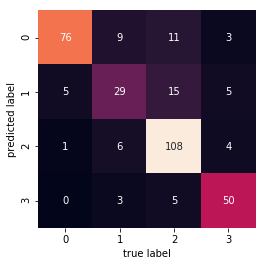

In [28]:
mat = confusion_matrix(y1_test,pred1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Second Model: Scaling the data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
scaler.fit(X1_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X1_train = scaler.transform(X1_train)
X1_test  = scaler.transform(X1_test)

In [32]:
mlp2 = MLPClassifier(hidden_layer_sizes=(20,20,20))
mlp2.fit(X1_train,y1_train)

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [33]:
print('Score: ', mlp2.score(X1_test,y1_test))

Score:  0.775757575758


In [34]:
pred2 = mlp2.predict(X1_test)

In [35]:
print(confusion_matrix(y1_test,pred2))

[[ 76   6   0   0]
 [ 19  24   3   1]
 [ 13  18 102   6]
 [  3   2   3  54]]


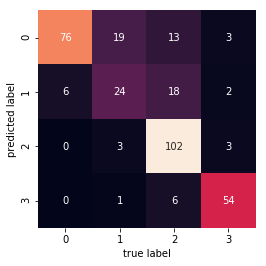

In [36]:
mat = confusion_matrix(y1_test,pred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
scores = []
predictions = []
conf_array = []
for i in range(11):
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=500)
    mlp.fit(X1_train,y1_train)
    preds=mlp.predict(X1_test)
    score = mlp.score(X1_test,y1_test)
    scores.append(score)
    conf_matx = confusion_matrix(y1_test,pred2)
    conf_array.append(conf_matx)

In [40]:
import scipy.stats as stats
import numpy as np

In [41]:
np.std(scores)

0.008892568810781815

### 2nd Score

In [42]:
print('2nd Score:', np.mean(scores))

2nd Score: 0.813774104683


If you're getting a convergence warning, you could try having the model train over more iterations - change max_iter = 1000 or 10,000. Does this improve the average score?

In [43]:
from matplotlib import pyplot

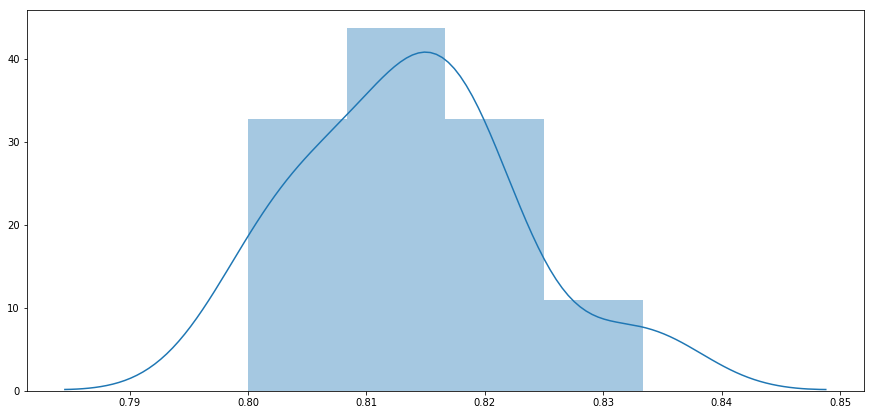

In [44]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(scores)

### Third Model: Max Iterations

In [45]:
mlp3 = MLPClassifier(alpha =0.001,hidden_layer_sizes=(30,30,30),max_iter=1000)

In [46]:
mlp3.fit(X1_train,y1_train)

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [47]:
pred3 = mlp3.predict(X1_test)

In [48]:
print('Score3: ',mlp3.score(X1_test,y1_test))
print(confusion_matrix(y1_test,pred3))

Score3:  0.80303030303
[[ 76   6   0   0]
 [ 13  30   2   2]
 [ 10  20 105   4]
 [  2   3   3  54]]


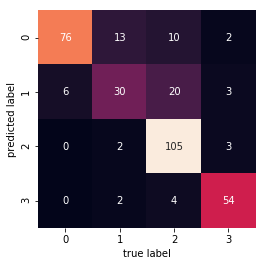

In [49]:
mat = confusion_matrix(y1_test,pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [50]:
scores = []
predictions = []
conf_array = []
for i in range(11):
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=500)
    mlp.fit(X1_train,y1_train)
    preds=mlp.predict(X1_test)
    score = mlp.score(X1_test,y1_test)
    scores.append(score)
    conf_matx = confusion_matrix(y1_test,pred3)
    conf_array.append(conf_matx)

In [51]:
np.std(scores)

0.0083193767881771276

### 3rd Score

In [52]:
print('3rd Score:', np.mean(scores))

3rd Score: 0.821487603306


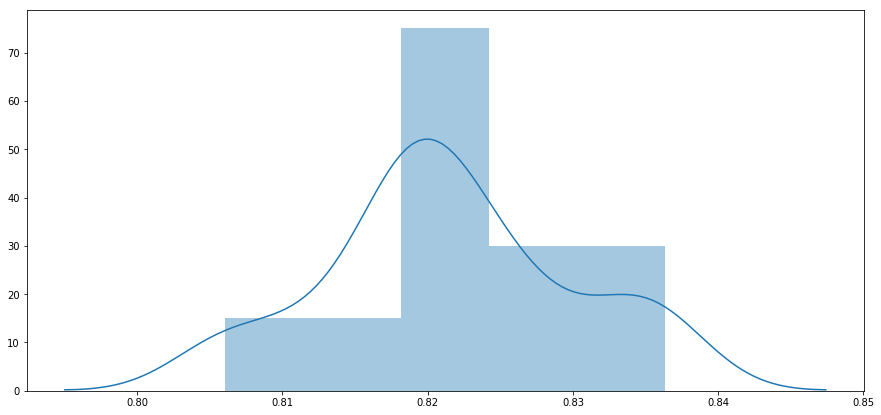

In [53]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(scores)

## Step 3: adding more inputs

Use X2 in place of X1 - does the score increase or decrease? Was this what you expected? How many samples are there in our training set?

In [54]:
df2 =pd.DataFrame(columns = ['FX11','FX12','FX13','TQ11','TQ12','TQ13',#first set
                             'FX21','FX22','FX23','TQ21','TQ22','TQ23',#fith set
                            'FX31','FX32','FX33','TQ31','TQ32','TQ33'])#tenth set

In [55]:
len(df2.columns)

18

In [56]:
for m in range(len(df2.columns)):
    df2.iloc[:,m] = [float(Arr_2[i][m]) for i in range(len(Arr_2))]
#df2['FX_2'] = [float(Arr_2[i][1]) for i in range(len(Arr_2))]
#df2['FX_3'] = [float(Arr_2[i][2]) for i in range(len(Arr_2))]
#df2['TQ_1'] = [float(Arr_2[i][3]) for i in range(len(Arr_2))]
#df2['TQ_2'] = [float(Arr_2[i][4]) for i in range(len(Arr_2))]
#df2['TQ_3'] = [float(Arr_2[i][5]) for i in range(len(Arr_2))]

### 2nd data frame

In [57]:
df2.head()

,FX11,FX12,FX13,TQ11,TQ12,TQ13,FX21,FX22,FX23,TQ21,TQ22,TQ23,FX31,FX32,FX33,TQ31,TQ32,TQ33
0,-1.0,-1.0,63.0,-3.0,-1.0,0.0,-1.0,-1.0,63.0,-3.0,-1.0,0.0,-1.0,-1.0,61.0,-3.0,0.0,0.0
1,-1.0,-1.0,63.0,-2.0,-1.0,0.0,-3.0,3.0,57.0,-8.0,-3.0,-1.0,-3.0,3.0,58.0,-10.0,-5.0,0.0
2,-1.0,0.0,57.0,-5.0,-3.0,0.0,0.0,0.0,61.0,-5.0,-2.0,0.0,-1.0,2.0,64.0,-7.0,-2.0,0.0
3,0.0,-1.0,59.0,-2.0,-1.0,-1.0,-1.0,0.0,60.0,-9.0,-5.0,-1.0,0.0,1.0,70.0,-9.0,-2.0,-1.0
4,0.0,-2.0,65.0,-4.0,-2.0,0.0,-1.0,-2.0,65.0,-5.0,-2.0,0.0,0.0,-3.0,63.0,-3.0,-1.0,0.0


In [58]:
df2.shape

(88, 18)

There are 88 sample or instances

In [59]:
df2['instance'] = [Arr_2_Event[i][0] for i in range(len(Arr_2_Event))]

In [60]:
df2['classes'] = df2['instance'].map(classes)

In [61]:
df2.head()

,FX11,FX12,FX13,TQ11,TQ12,TQ13,FX21,FX22,FX23,TQ21,TQ22,TQ23,FX31,FX32,FX33,TQ31,TQ32,TQ33,instance,classes
0,-1.0,-1.0,63.0,-3.0,-1.0,0.0,-1.0,-1.0,63.0,-3.0,-1.0,0.0,-1.0,-1.0,61.0,-3.0,0.0,0.0,normal,0
1,-1.0,-1.0,63.0,-2.0,-1.0,0.0,-3.0,3.0,57.0,-8.0,-3.0,-1.0,-3.0,3.0,58.0,-10.0,-5.0,0.0,normal,0
2,-1.0,0.0,57.0,-5.0,-3.0,0.0,0.0,0.0,61.0,-5.0,-2.0,0.0,-1.0,2.0,64.0,-7.0,-2.0,0.0,normal,0
3,0.0,-1.0,59.0,-2.0,-1.0,-1.0,-1.0,0.0,60.0,-9.0,-5.0,-1.0,0.0,1.0,70.0,-9.0,-2.0,-1.0,normal,0
4,0.0,-2.0,65.0,-4.0,-2.0,0.0,-1.0,-2.0,65.0,-5.0,-2.0,0.0,0.0,-3.0,63.0,-3.0,-1.0,0.0,normal,0


In [62]:
X2 = df2.drop(columns = ['instance','classes'])
y2 = df2['classes']

In [63]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2)

In [64]:
mlp_v2 = MLPClassifier(hidden_layer_sizes=(20,20,20))

In [65]:
mlp_v2.fit(X2_train,y2_train)

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [66]:
mlp_v2.score(X2_test,y2_test)

0.77272727272727271

The score has significantly decreased with the introduction of 12 more features from ~0.85 to ~0.73. Let us see how much of a difference does scaling the data make.

In [67]:
scaler2 = StandardScaler()

In [68]:
scaler2.fit(X2_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
X2_train = scaler2.transform(X2_train)
X2_test = scaler2.transform(X2_test)

In [70]:
mlp_v3 =MLPClassifier(hidden_layer_sizes=(20,20,20))

In [71]:
mlp_v3.fit(X2_train,y2_train)

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [72]:
mlp_v3.score(X2_test,y2_test)

0.77272727272727271

In [73]:
pred4 = mlp_v3.predict(X2_test)

In [74]:
print('Score4: ',mlp_v3.score(X2_test,y2_test))
print(confusion_matrix(y2_test,pred4))

Score4:  0.772727272727
[[7 0 0 0]
 [2 2 0 1]
 [0 0 6 0]
 [2 0 0 2]]


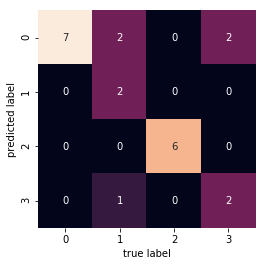

In [75]:
mat = confusion_matrix(y2_test,pred4)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [76]:
scores = []
predictions = []
conf_array = []
for i in range(11):
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter=500)
    mlp.fit(X2_train,y2_train)
    preds=mlp.predict(X2_test)
    score = mlp.score(X2_test,y2_test)
    scores.append(score)
    conf_matx = confusion_matrix(y2_test,pred4)
    conf_array.append(conf_matx)

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [77]:
np.std(scores)

0.040063469896002735

### 4th Score

In [78]:
print('4th Score:', np.mean(scores))

4th Score: 0.789256198347


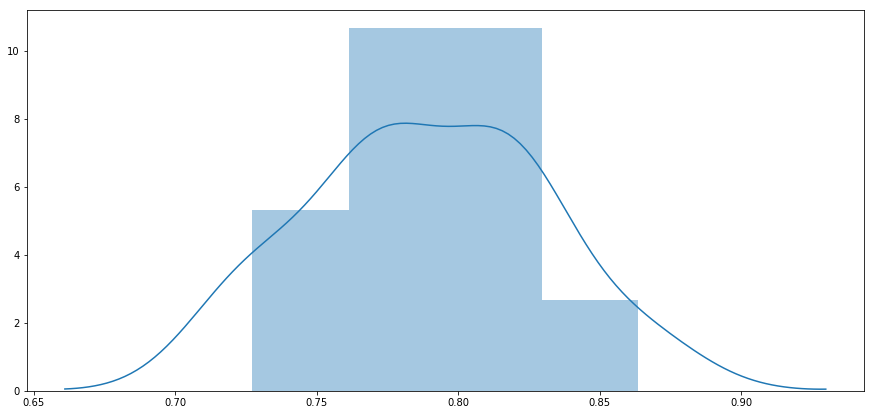

In [79]:
fig, ax = pyplot.subplots(figsize=(15,7))
sns.distplot(scores)

### Findings

There is a considerable improvement of the model with a higher score simply by scaling the features.

Back to X1 as our input. Add an extra feature to each item in the array to represent the total force $f_t$. Assume:

$f_t^2 = f_1^2 + f_2^2 + f_3^2$

Your first input should now look like this:
X1[0] = [-1, -1, 61, -3, 0, 0, 61.0163912403872]

Repeat the steps from step 2. *Has this extra feature improved model performance?*

## Step 5: exploring

Create at least 3 more models, adding features or changing the number and size of the hidden layers. Print out the average score for your best model. Comment on what you've found.

### Random Forest

In [81]:
X2 = df2.drop(columns = ['instance','classes'])
y2 = df2['classes']

In [91]:
from sklearn.datasets import make_blobs

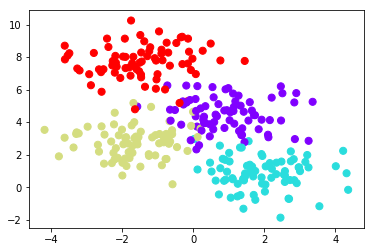

In [86]:
X2, y2 = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='rainbow');

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [88]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
model = RandomForestRegressor(n_jobs=-1)

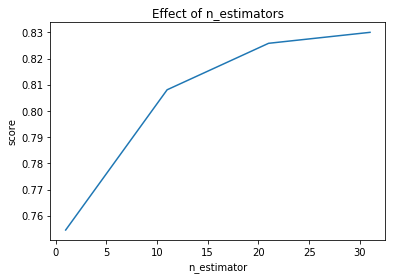

In [94]:
estimators = np.arange(1, 33, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [95]:
y_predicted = model.predict(X_test)

In [97]:
from sklearn.metrics import r2_score

In [100]:
score = r2_score(y_test, y_predicted)
print('5th Score:', np.mean(score))

5th Score: 0.83000662189


In [105]:
len(y_predicted), len(y_test)

(60, 60)

In [107]:
import xgboost as xgb

C:\Users\113011371\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [108]:
model = xgb.XGBRegressor()

In [109]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [114]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [116]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(model, X2, y2, cv=kfold)
print("Accuracy: ", results.mean())

Accuracy:  0.782169102628


### Decision Trees

In [117]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
from sklearn.tree import export_graphviz 

In [119]:
array = df2.values

In [121]:
X = array[:,0:5]
Y = array[:,5]

In [122]:
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [123]:
dt = DecisionTreeRegressor()

In [124]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [125]:
Y_predicted = dt.predict(X_test)

In [126]:
dt.score(X_test, Y_predicted)

1.0

In [127]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [128]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,
                filled=True, 
                rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_jpeg("dtree.png")

True

### Multiple Linear Regresssion

In [130]:
from sklearn import linear_model # for linear regression modeling
from sklearn import preprocessing # for preprocessing like imputting missing values

In [132]:
X2 = df2.drop(columns = ['instance','classes'])
y2 = df2['classes']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2)

In [134]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [135]:
predictions = lm.predict(X_test)

In [137]:
print("Score:", model.score(X_test, y_test))

Score: -2.41787460747
